# Problem 1: Visualize a static map (8 points)

In [2]:
# load modules
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
import mapclassify
import contextily as ctx
%matplotlib inline

In [3]:
# Filepaths
grid_fp = "data/dataE5/TravelTimes_to_5975375_RailwayStation.shp"
roads_fp = "data/dataE5/roads.shp"
metro_fp = "data/dataE5/metro.shp"

# Read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

In [4]:
# Check the crs of each layer
print(roads.crs)
print(metro.crs)
print(grid.crs)

epsg:2392
epsg:2392
epsg:3067


In [5]:
# Check CRS names
print("Roads crs:", CRS(roads.crs).name)
print("Metro crs:", CRS(metro.crs).name)
print("Grid crs: ",CRS(grid.crs).name)

Roads crs: KKJ / Finland zone 2
Metro crs: KKJ / Finland zone 2
Grid crs:  ETRS89 / TM35FIN(E,N)


In [6]:
# Reproject geometries to the same crs:
roads = roads.to_crs(epsg=3857)
metro = metro.to_crs(epsg=3857)
grid = grid.to_crs(epsg=3857)

In [7]:
# Check the projections are the same
roads.crs == metro.crs == grid.crs

True

In [8]:
# Check the grid data
# grid.head()

In [9]:
# Calculate the difference in travel time between peak hours and normal times
grid['car_diff'] = grid['car_r_t']-grid['car_m_t']

<AxesSubplot:ylabel='Frequency'>

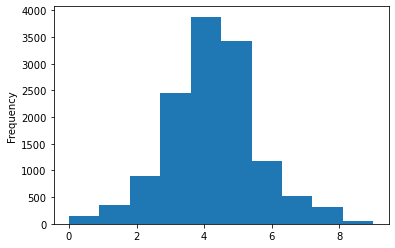

In [10]:
# Check the distribution of difference in time
grid['car_diff'].plot.hist(bins=10)

# It takes 0-9 minutes longer during peak hour to travel from the centre to different parts of the city

In [11]:
# Create a UserDefined classifier
classifier_ud = mapclassify.UserDefined(y=grid['car_diff'], bins=[0,1,2,3,4,5,6,7,8])

In [12]:
# Check the counts of the classifier
classifier_ud

UserDefined         

  Interval     Count
--------------------
[0.00, 0.00] |   153
(0.00, 1.00] |   347
(1.00, 2.00] |   904
(2.00, 3.00] |  2452
(3.00, 4.00] |  3879
(4.00, 5.00] |  3416
(5.00, 6.00] |  1183
(6.00, 7.00] |   522
(7.00, 8.00] |   321
(8.00, 9.00] |    54

In [13]:
# Add one more column of the classification
grid['car_diff_class'] = grid[['car_diff']].apply(classifier_ud)

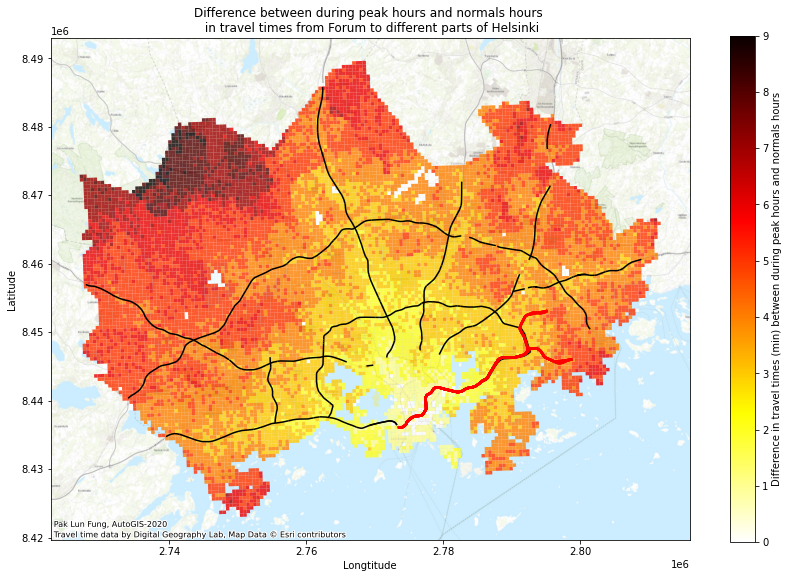

In [14]:
# Create one subplot. Control figure size in here.
fig, ax = plt.subplots(figsize=(12,8))

# Create a colormap
color_map = plt.cm.get_cmap('hot')
reversed_color_map = color_map.reversed()

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
grid.plot(ax=ax, 
          column="car_diff_class", 
          linewidth=0.03, 
          cmap=reversed_color_map, 
#          scheme='userdefined',
          alpha=0.8,
          legend=True,
          legend_kwds={'label':'Difference in travel times (min) between during peak hours and normals hours'}
         )

# Add title and axis names
plt.title('Difference between during peak hours and normals hours \n in travel times from Forum to different parts of Helsinki')
plt.xlabel('Longtitude')
plt.ylabel('Latitude')

# Add roads on top of the grid
# (use ax parameter to define the map on top of which the second items are plotted)
roads.plot(ax=ax, color="black", linewidth=1.5)

# Add metro on top of the previous map
metro.plot(ax=ax, color="red", linewidth=2.5)

# Put legend
#ax.get_xaxis().get_major_formatter().set_scientific(False)
#ax.get_legend().set_bbox_to_anchor((1.35,1))

# Add Esri basemap and credits
credits = "Pak Lun Fung, AutoGIS-2020 \nTravel time data by Digital Geography Lab, Map Data © Esri contributors"
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldTopoMap, attribution=credits)

# Remove the empty white-space around the axes
plt.tight_layout()

# Save the figure as png file with resolution of 300 dpi
outfp = "docs/Problem1_static_map.png"
plt.savefig(outfp, dpi=300 , facecolor='w')